In [26]:

#C:\Proyecto_data_science\.kaggle\kaggle.json
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

'''api_token={"username":"juanramirez95","key":"eab91575bbf42eadfe12c2342b4b34a3"}

import json
with open('C:\Proyecto_data_science\.kaggle\kaggle.json','w') as file:
    json.dump(api_token,file)'''
    
!kaggle datasets download -d anthonytherrien/depression-dataset -p C:\Proyecto_data_science\.kaggle
ar_zip=r'C:\Proyecto_data_science\.kaggle\depression-dataset.zip'
print(ar_zip)
print("\n"*2)

with zipfile.ZipFile(ar_zip,'r') as zip_file:
    for nombre_archivo in zip_file.namelist():
        print(nombre_archivo)
        zip_file.extract(nombre_archivo, r"C:\Proyecto_data_science\.kaggle")
print("\n"*2)

csv_file_path = r"C:\Proyecto_data_science\.kaggle\depression_data.csv"
df = pd.read_csv(csv_file_path)
print(df.head())
print("\n"*2)



Dataset URL: https://www.kaggle.com/datasets/anthonytherrien/depression-dataset
License(s): CC-BY-SA-4.0
depression-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
C:\Proyecto_data_science\.kaggle\depression-dataset.zip



depression_data.csv



               Name  Age Marital Status    Education Level  \
0  Christine Barker   31        Married  Bachelor's Degree   
1  Jacqueline Lewis   55        Married        High School   
2    Shannon Church   78        Widowed    Master's Degree   
3    Charles Jordan   58       Divorced    Master's Degree   
4      Michael Rich   18         Single        High School   

   Number of Children Smoking Status Physical Activity Level  \
0                   2     Non-smoker                  Active   
1                   1     Non-smoker               Sedentary   
2                   1     Non-smoker               Sedentary   
3                   3     Non-smoker                Moderate   
4             

In [27]:
# Chequeo de datos
cantidad= df.value_counts().sum()
print('la cantidad de datos que poseemos son:',cantidad)
print(df.columns)
print("\n"*2)

# Cambio de tipo de dato
convert_category=['Marital Status','Education Level','Number of Children','Smoking Status','Physical Activity Level','Employment Status','Alcohol Consumption','Dietary Habits','Sleep Patterns','History of Mental Illness','History of Substance Abuse','Family History of Depression','Chronic Medical Conditions']
df[convert_category]= df[convert_category].astype('category')
print("\n")

# Chequeo de datos nulos
miss_df= df.isnull().sum()
print(miss_df)
df.info()
print("\n")

# Chequeo de datos
valores=['Age', 'Marital Status', 'Education Level','Number of Children', 'Smoking Status', 'Physical Activity Level','Employment Status', 'Alcohol Consumption', 'Dietary Habits','Sleep Patterns', 'History of Mental Illness','History of Substance Abuse', 'Family History of Depression','Chronic Medical Conditions']
# Iterar a través de cada columna en la lista y mostrar value_counts
for columna in valores:
    if columna in df.columns:
        print(f"conteo de valores para la columna: {columna}")
        print(df[columna].value_counts())
        print("\n" + "="*50 + "\n")
    else:
        print(f"La columna '{columna}' no existe en el DataFrame.\n")


la cantidad de datos que poseemos son: 413768
Index(['Name', 'Age', 'Marital Status', 'Education Level',
       'Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')





Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int

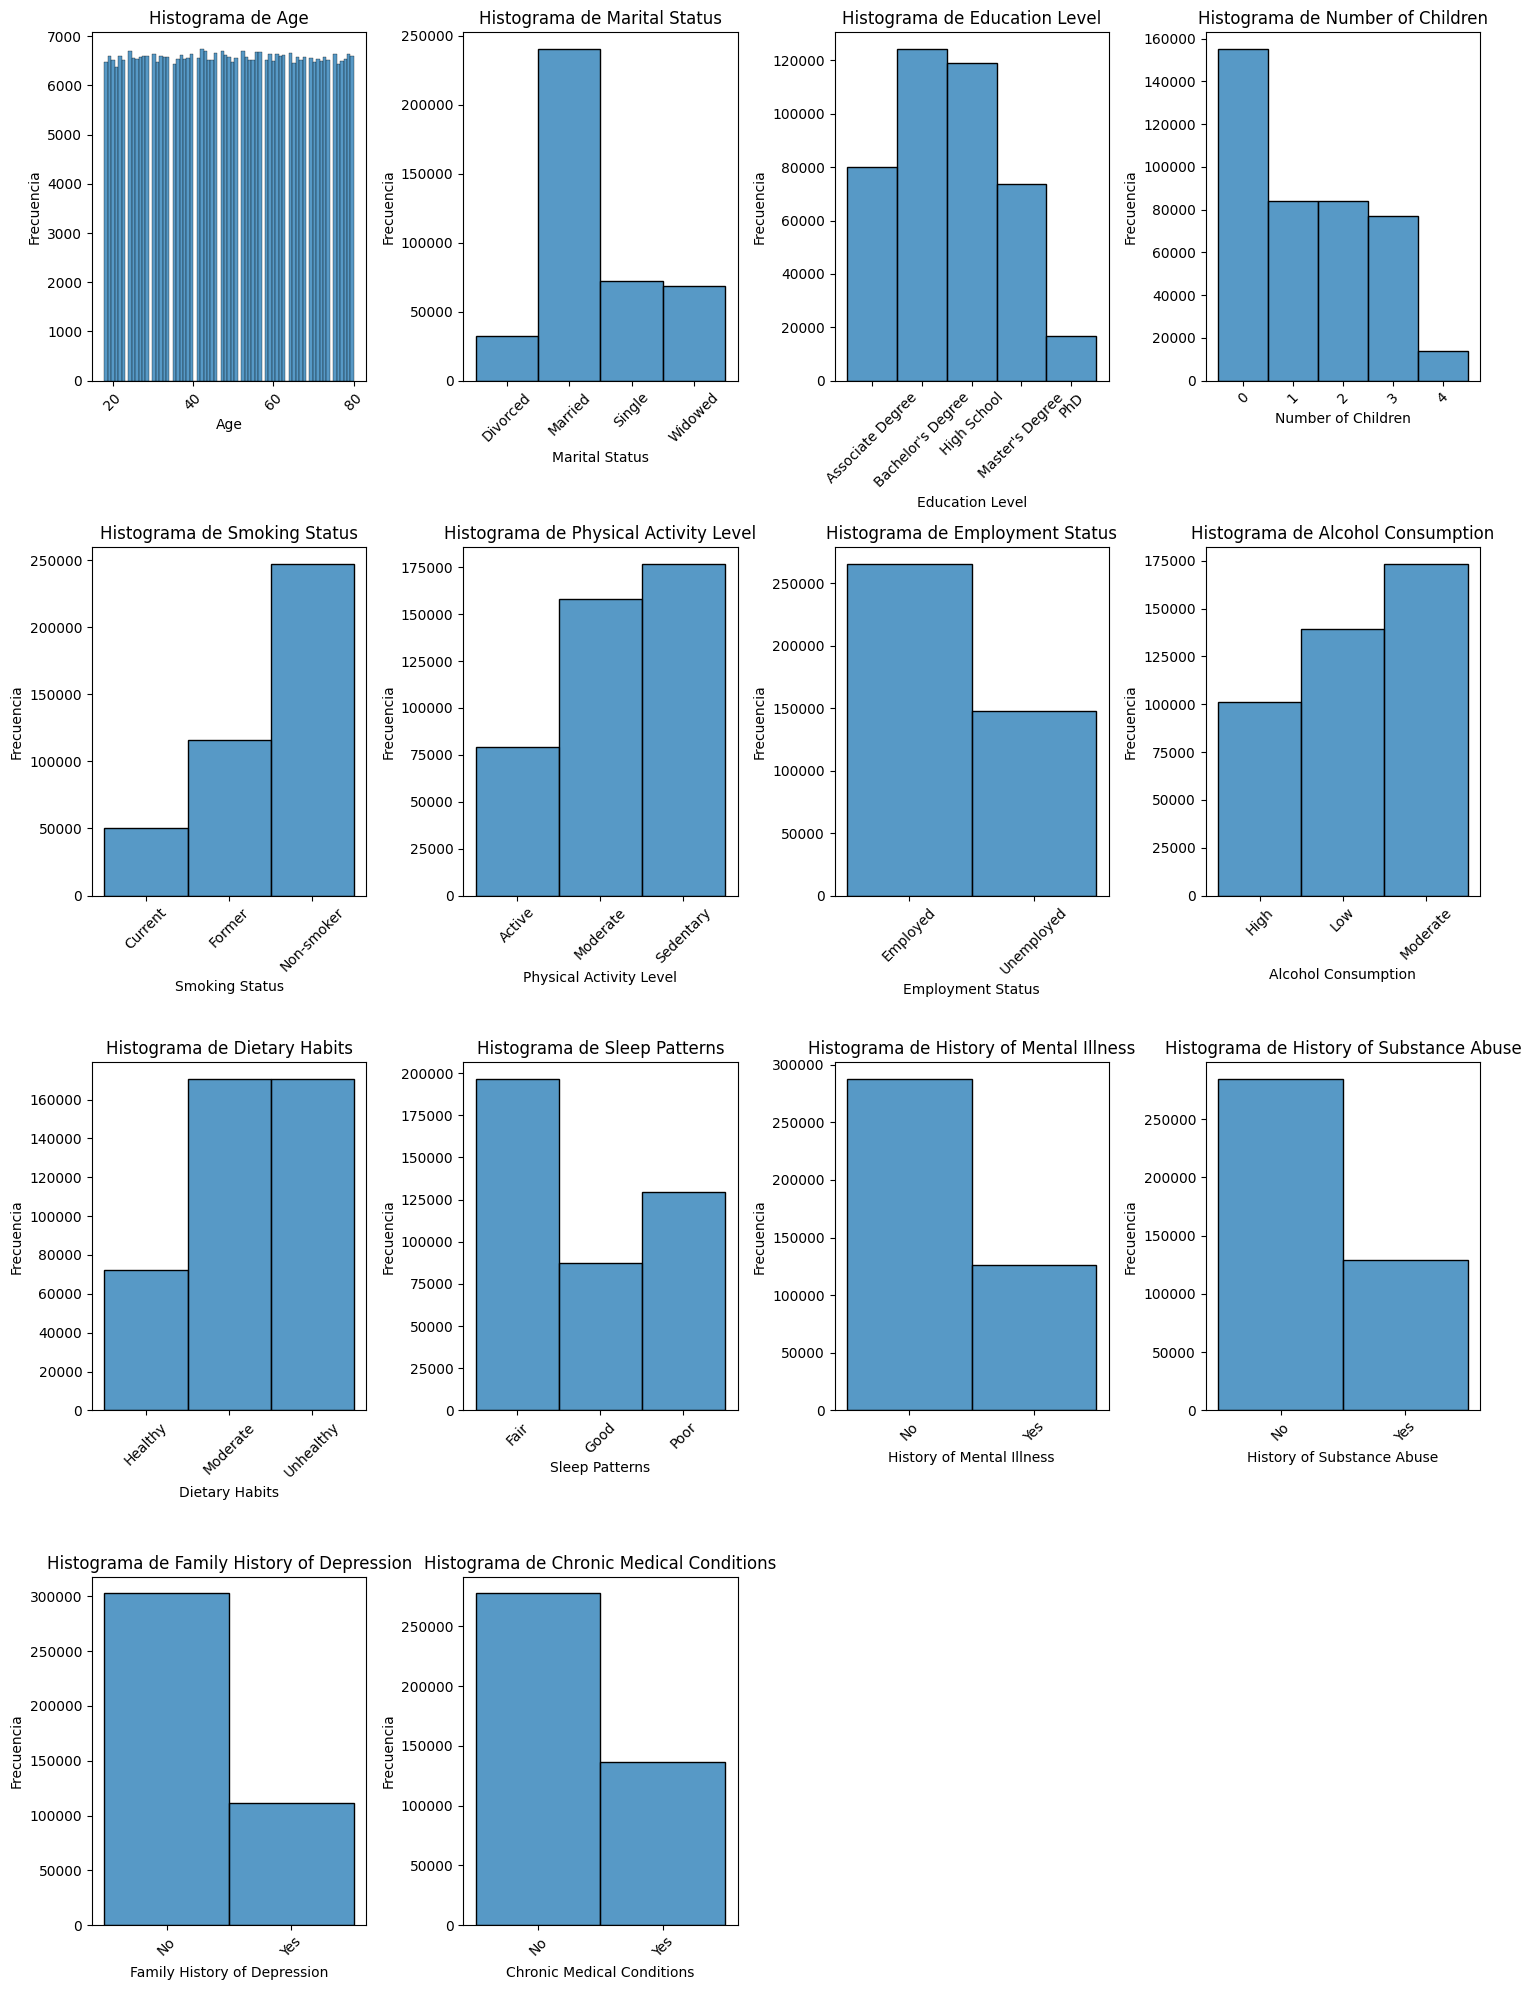

In [28]:
# Configuración de la cuadrícula
num_cols = 4
num_rows = (len(valores) + num_cols - 1) // num_cols  # Calcula el número de filas necesarias

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Iterar a través de cada columna en la lista y crear histogramas
for i, columna in enumerate(valores):
    if columna in df.columns:
        ax = axs[i // num_cols, i % num_cols]  # Determina la posición en la cuadrícula
        sns.histplot(df[columna], kde=False, ax=ax)
        ax.set_title(f'Histograma de {columna}')
        ax.set_xlabel(columna)
        ax.set_ylabel('Frecuencia')
        ax.tick_params(axis='x', rotation=45)


# Elimina subplots vacíos si el número de columnas no es múltiplo de num_cols
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

valores unico de edad: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80]




[0, 20, 30, 40, 50, 60, 70, 80]


rangos de edad: ['0 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80']







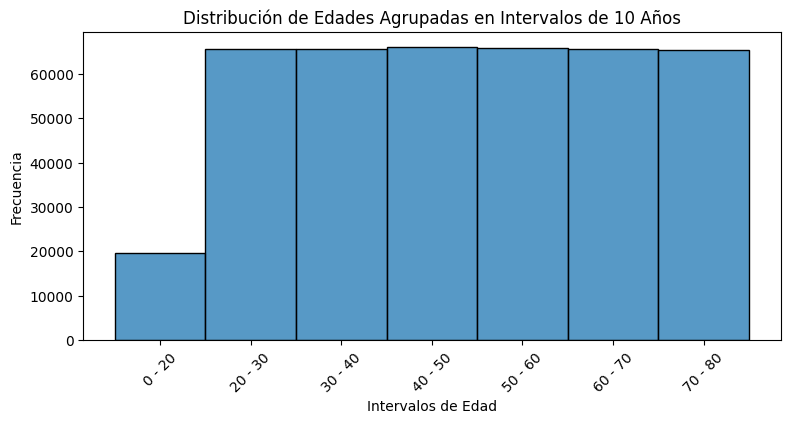

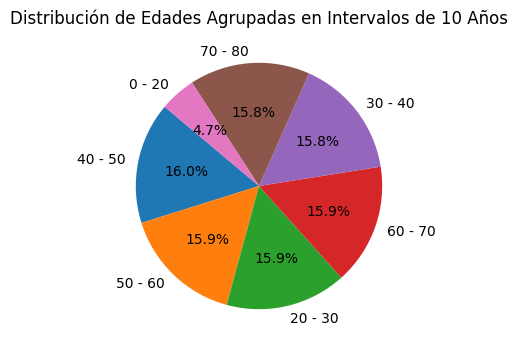

In [29]:
#Analisis por edades

Edades = df['Age'].unique() #valores unicos
Edades.sort()
print('valores unico de edad:', Edades)
print("\n")
'''No se encontraron valores de edad de 16 hacia abajo'''

#separando data de edades de 10 en 10
contener = [0]+[i for i in range(20,81,10)]
print("\n")
etiquetas = [f'{contener[i]} - {contener[i+1]}' for i in range(len(contener)-1)] #generando etiquetas
df['data_ages'] = pd.cut(df['Age'],bins=contener,labels=etiquetas) 
print(contener)
print("\n")
print('rangos de edad:',etiquetas)
print("\n")
df[['Age', 'data_ages']]
print("\n"*2)

graficar = df[['Age', 'data_ages']].sort_values('Age')
fig = plt.figure(figsize = (9,4))
sns.histplot(graficar['data_ages'])
plt.title('Distribución de Edades Agrupadas en Intervalos de 10 Años')
plt.xlabel('Intervalos de Edad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
plt.show()


graficar2 = graficar['data_ages'].value_counts()
plt.figure(figsize=(9, 4))
plt.pie(graficar2, labels=graficar2.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Edades Agrupadas en Intervalos de 10 Años')
plt.show()


valores unicos: ['Bachelor's Degree', 'High School', 'Master's Degree', 'Associate Degree', 'PhD']
Categories (5, object): ['Associate Degree', 'Bachelor's Degree', 'High School', 'Master's Degree', 'PhD']








Text(0.5, 1.0, 'Empleados vs Desempleados')

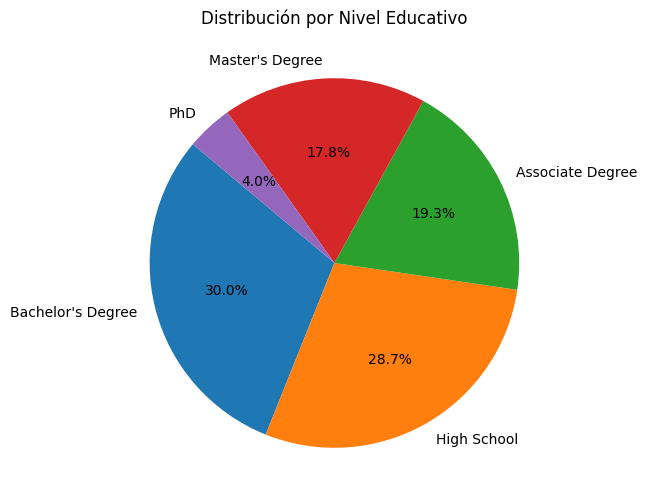

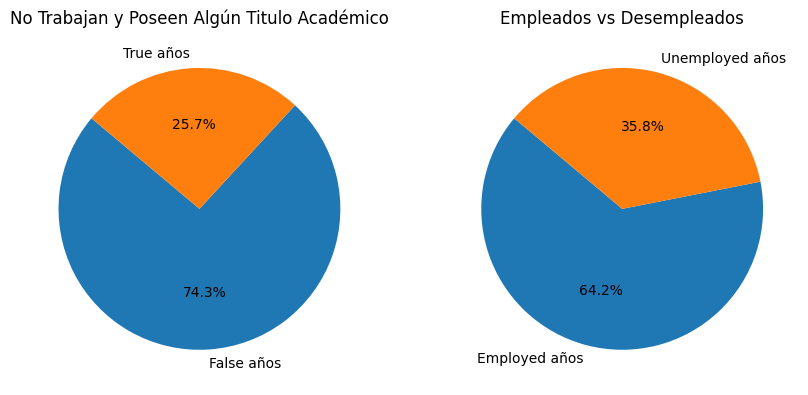

In [40]:
# Crear el gráfico de educación
estado_edu = df['Education Level'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(estado_edu, labels=[f'{label}' for label in estado_edu.index], autopct='%1.1f%%', startangle=140)
ax.set_title('Distribución por Nivel Educativo')
print()


#Situacion laboral / titulados
Educacion= df['Education Level'].unique() #valores unicos
print('valores unicos:', Educacion)

df['No trabajan con titulo'] = (df['Education Level'].isin(["Bachelor's Degree", "Master's Degree",'Associate Degree', 'PhD'])) & (df['Employment Status']=='Unemployed')
cuenta_no_lab = df['No trabajan con titulo'].value_counts()
print("\n"*2)

# Primer gráfico de pastel
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.pie(cuenta_no_lab, labels=[f'{label} años' for label in cuenta_no_lab.index], autopct='%1.1f%%', startangle=140)
ax1.set_title('No Trabajan y Poseen Algún Titulo Académico')
print("\n"*2)

cuenta_lab = df['Employment Status'].value_counts()
# Segundo gráfico de pastel
ax2.pie(cuenta_lab, labels=[f'{label} años' for label in cuenta_lab.index], autopct='%1.1f%%', startangle=140)
ax2.set_title('Empleados vs Desempleados')